In [1]:
import shutup
shutup.please()

import gym
import src.environments.continuous.stock_trading  

import numpy as np
import pandas as pd 

In [2]:
def environment():
    env = gym.make('StockTradingEnvironment-v0',
                   use_technical_indicators= [
        "macd",
        "boll_ub",
        "boll_lb",
        "rsi_30",
        "cci_30",
        "dx_30",
        "close_30_sma",
        "close_60_sma",
    ])
    
    env.success_threshold =0.05 # 5%
    return env


In [3]:
env = environment()

In [4]:
env.load_dataset_by_index(0)
#env.df

In [5]:
env.success_threshold

0.05

In [6]:
state = env.reset()

In [7]:
state

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.90030326e-03,  1.87147362e-02,
         9.09421594e-03,  4.74718183e-02, -8.50037047e-02,
         0.00000000e+00,  2.10300007e-01,  1.11458212e-01,
        -3.93616756e+01,  9.27492694e+02,  8.46963087e+02,
         4.96732694e-01, -2.41709957e-01,  1.98473802e-01,
         8.78917097e+02,  8.68108402e+02,  7.20000000e-02,
         9.28000000e-01,  0.00000000e+00, -9.86666667e-02,
         1.80000000e-02,  8.98333333e-01,  8.36666667e-02,
         7.81266667e-01,  3.96250000e-01,  8.00000000e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.47059183e-03, -1.59832906e-02,
        -2.17082060e-02, -2.31566688e-02, -1.11349986e-02,
         1.00000000e+00,  2.48700008e-01,  1.03472762e-01,
        -1.53551186e+02, -1.90424980e+03, -1.73984451e+

In [8]:
next_state = env.step([1])
next_state 

(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -9.47059183e-03, -1.59832906e-02,
         -2.17082060e-02, -2.31566688e-02, -1.11349986e-02,
          1.00000000e+00,  2.48700008e-01,  1.03472762e-01,
         -1.53551186e+02, -1.90424980e+03, -1.73984451e+03,
          4.16919116e-01, -4.18726512e-01,  3.32568873e-01,
         -1.79616630e+03, -1.77952311e+03,  1.43750000e-01,
          8.56250000e-01,  0.00000000e+00, -2.00150000e-01,
          6.60000000e-02,  8.54000000e-01,  8.00000000e-02,
          2.91400000e-01,  3.78750000e-01,  7.00000000e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -2.87933814e-02, -1.37643710e-02,
         -1.55318725e-02, -1.41297256e-02,  1.19711563e-01,
          7.50000000e-01,  2.33400002e-01,  1.17214165e-01,
          5.77664287e+02, -3.09574828e+

In [9]:
next_state[0][0] == state[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [10]:
from src.agents.actor_critic.a2c import A2CAgent

In [11]:
agent=A2CAgent(environment, epochs=1, actor_learning_rate=0.000025,critic_learning_rate=0.000025)
agent.load()
environment().success_threshold

0.05

In [12]:
# agent.env.mode = "train"
# agent.learning_log.episodes = 0
# agent.learn(
#     timesteps=-1, 
#     log_every=1000,
#     success_threshold_lookback=1000,
#     success_strict=True,
    
# )

C:\Users\filip\Development\GIT\tmp\reinforcement-learning\src\utils\trading_graph.py:160: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(self.fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


KeyboardInterrupt: 

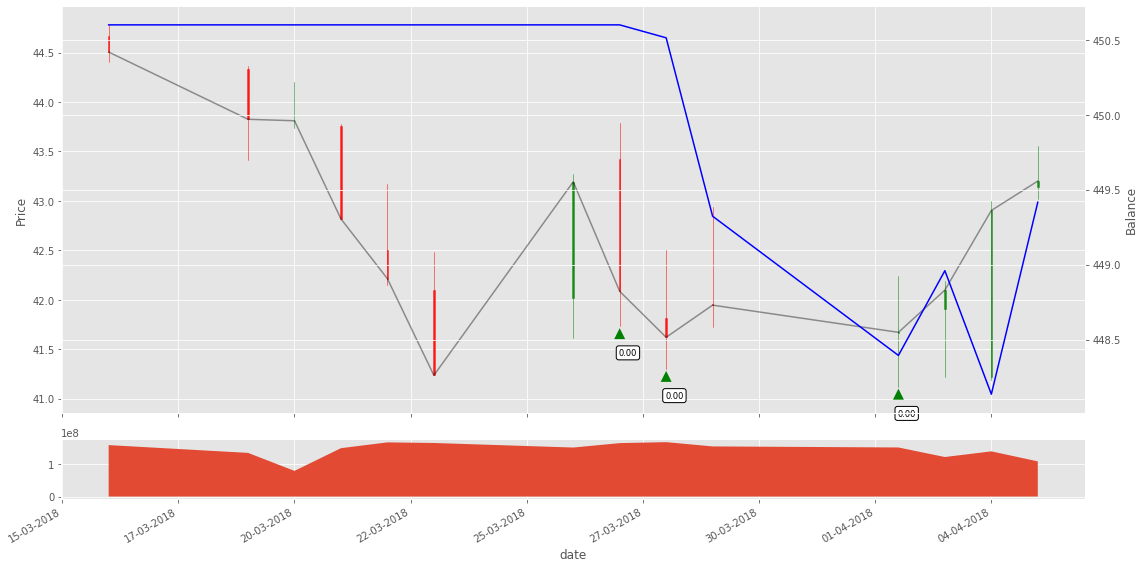

In [13]:
agent.env.mode = "test"
scores = []
success = 0

for i in range(2):
    state = agent.env.reset(visualize=True)
    score = 0
    reward = 0
    done = False
    initial_portfolio = agent.env.portfolio_value
    step = 0
    while not done:
        agent.env.render()
        #state = np.expand_dims(state, axis=0)
        action, action_onehot, prediction = agent.act(state)
        # Retrieve new state, reward, and whether the state is terminal
        next_state, reward, done, _ = agent.env.step(action)
        #print(action, reward, agent.env.portfolio_value)
        # Memorize (state, action, reward) for training
        #self.buffer.remember(np.expand_dims(state, axis=0), action_onehot, reward)
        # Update current state
        if done :
            if step < agent.env.window_size-1:
                success +=1
        step+=1
        state = next_state
        score += reward
    
    #print(score,initial_portfolio, agent.env.portfolio_value)
    scores.append(score)
    
print(np.mean(scores))
print(min(scores))
print(max(scores))
print(success)

In [ ]:
agent.env.close()